# Automated Cyberbullying Detection in Text Conversations Using Natural Language Processing


In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import nltk

# Suppress warnings
warnings.filterwarnings("ignore")

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Load the dataset
file_path = "/content/cyberbullying_tweets.csv"  # Adjust path if the file is elsewhere
df = pd.read_csv(file_path)

# Display the first 5 rows
print("\nFirst 5 Rows of the Dataset:")
df.head()


First 5 Rows of the Dataset:


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [5]:
# View general information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB
None


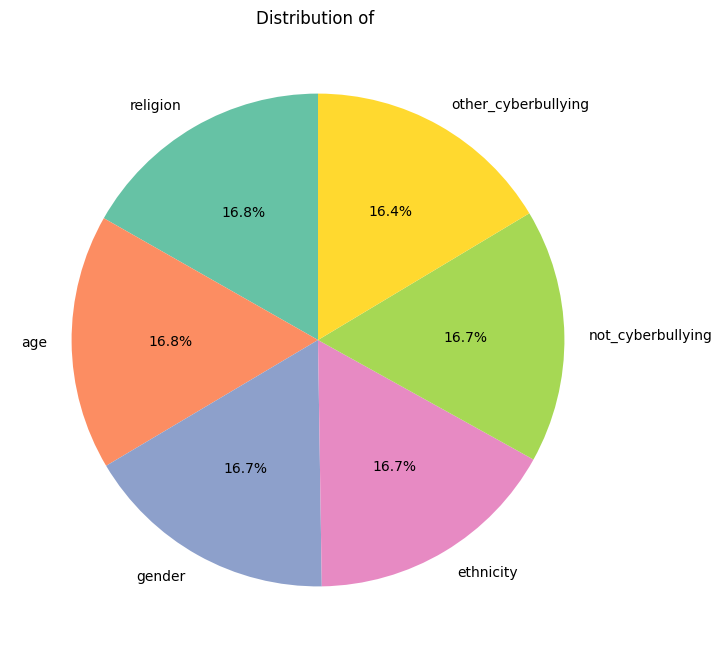

In [6]:
# Calculate the percentage distribution of each class
class_distribution = df['cyberbullying_type'].value_counts()
class_percentages = (class_distribution / len(df)) * 100

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    class_percentages,
    labels=class_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2")
)
plt.title("Distribution of ")
plt.show()


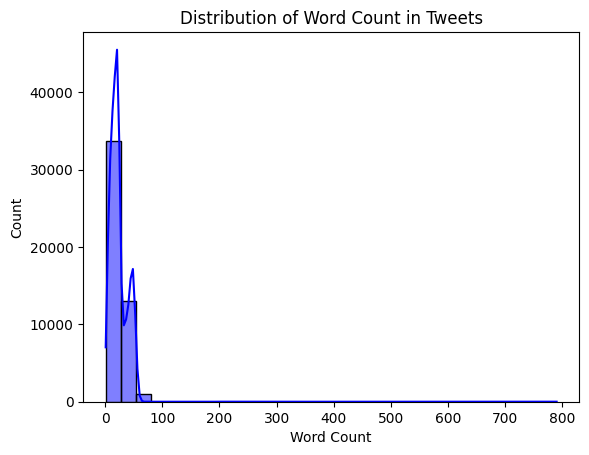

In [7]:
# Add word count column
df['word_count'] = df['tweet_text'].apply(lambda x: len(x.split()))

# Plot distribution of word counts
sns.histplot(df['word_count'], kde=True, bins=30, color='blue')
plt.title("Distribution of Word Count in Tweets")
plt.xlabel("Word Count")
plt.show()


In [8]:
# Example tweets from each class
for bullying_type in df['cyberbullying_type'].unique():
    sample = df[df['cyberbullying_type'] == bullying_type]['tweet_text'].iloc[0]
    print(f"Sample for '{bullying_type}':\n{sample}\n")


Sample for 'not_cyberbullying':
In other words #katandandre, your food was crapilicious! #mkr

Sample for 'gender':
rape is real..zvasiyana nema jokes about being drunk or being gay or being lesbian...rape is not ones choice or wish..thtz where the sensitivity is coming from

Sample for 'religion':
Sudeep, did she invite him though? No right? Why are you getting worded up? You're okay with Parvesh Verma cause he speaks against Muslims but against an idiot like Imam because he called for chakka jam?

Sample for 'other_cyberbullying':
@ikralla fyi, it looks like I was caught by it. I'm not a botter, so...

Sample for 'age':
Here at home. Neighbors pick on my family and I. Mind you my son is autistic. It feels like high school. They call us names attack us for no reason and bully us all the time. Can't step on my front porch without them doing something to us

Sample for 'ethnicity':
Hey dumb fuck celebs stop doing something for people for publicity on Facebook... Wtf happen to life u nig

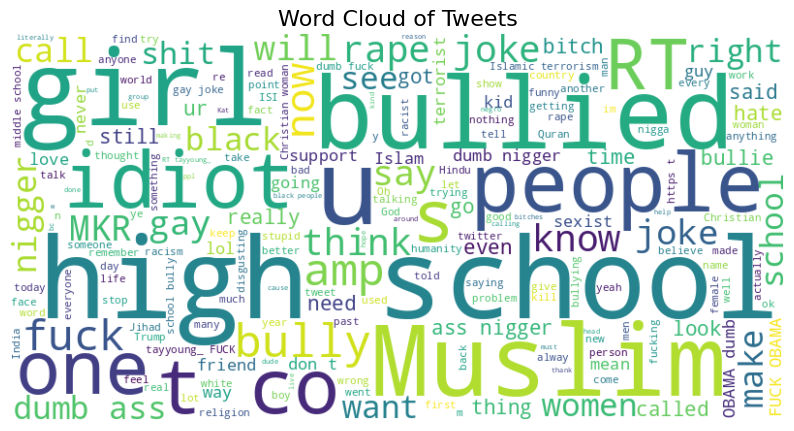

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the tweet texts into one string
all_text = " ".join(df['tweet_text'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tweets", fontsize=16)
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


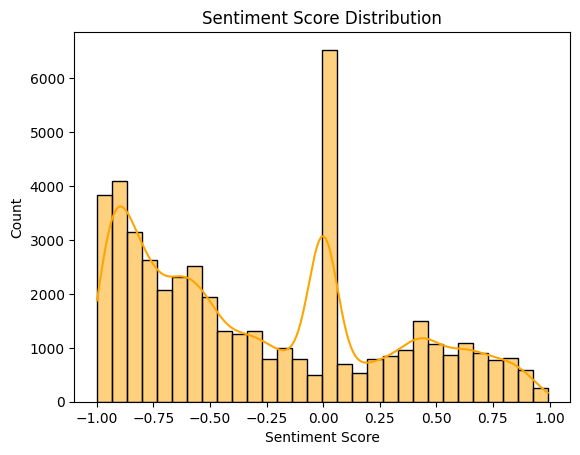

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores
df['sentiment_score'] = df['tweet_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Plot sentiment distribution
sns.histplot(df['sentiment_score'], kde=True, bins=30, color='orange')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.show()



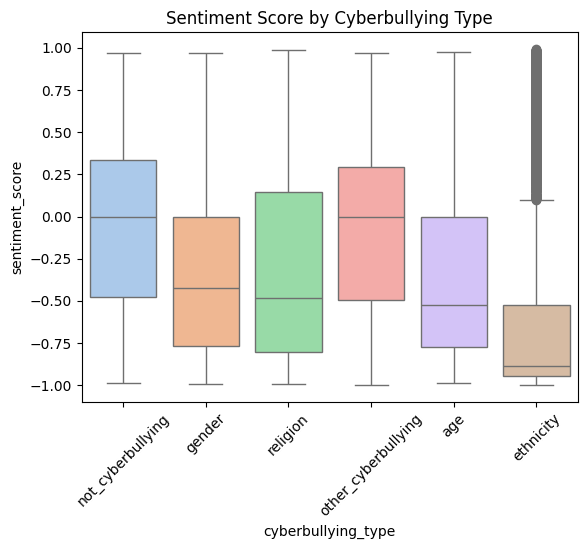

In [11]:
# Boxplot of sentiment score by class
sns.boxplot(x='cyberbullying_type', y='sentiment_score', data=df, palette="pastel")
plt.title("Sentiment Score by Cyberbullying Type")
plt.xticks(rotation=45)
plt.show()


In [12]:
# Display top 5 most negative and positive tweets
most_negative = df.nsmallest(5, 'sentiment_score')
most_positive = df.nlargest(5, 'sentiment_score')

print("Most Negative Tweets:")
print(most_negative[['tweet_text', 'sentiment_score']])

print("\nMost Positive Tweets:")
print(most_positive[['tweet_text', 'sentiment_score']])


Most Negative Tweets:
                                              tweet_text  sentiment_score
29205  is feminazi an actual word with a denot…\r\n@N...          -0.9994
44035  You so black and white trying to live like a n...          -0.9994
45165  @hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...          -0.9989
41739  Dumb dumb dumb dumb db dub dumb dumb stupid du...          -0.9967
46027  Fuck Fuck georgegambnino georgegambnino Nigeri...          -0.9963

Most Positive Tweets:
                                              tweet_text  sentiment_score
43005  happy birthday to one of my first best friends...           0.9927
20819  You've got to find a good Christian woman, BUT...           0.9876
40503  ALLI !!! HAPPY HAPPY BIRTHDAAAY @jiminiehopps ...           0.9873
41230  AHHAAHAHHAHAHA Thank u smm hope I get to redra...           0.9863
41389  bea! ur one of my first friends here and i'm s...           0.9861


# 3. Preprocessing
### a. Tokenization, Normalization, and Stopword Removal

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['tweet_text'].apply(preprocess_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


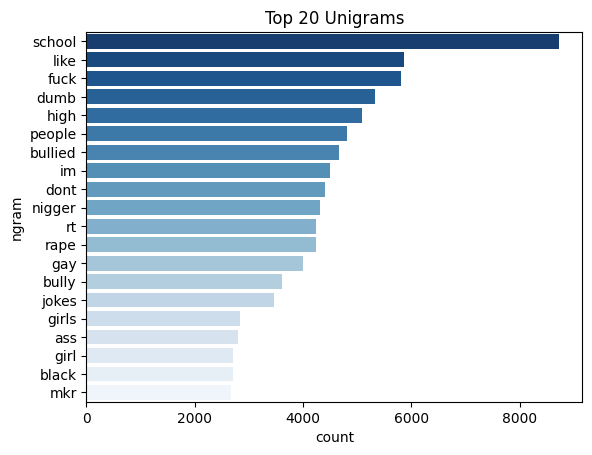

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Unigram, bigram, and trigram analysis
def plot_ngrams(corpus, n=1, top_k=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(corpus)
    ngram_counts = ngrams.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    ngram_freq = pd.DataFrame({'ngram': ngram_vocab, 'count': ngram_counts}).sort_values(by='count', ascending=False)

    sns.barplot(x='count', y='ngram', data=ngram_freq.head(top_k), palette="Blues_r")
    plt.title(f"Top {top_k} {'Bigrams' if n == 2 else 'Trigrams' if n == 3 else 'Unigrams'}")
    plt.show()

# Apply n-gram plotting
plot_ngrams(df['cleaned_text'], n=1, top_k=20)  # Unigrams



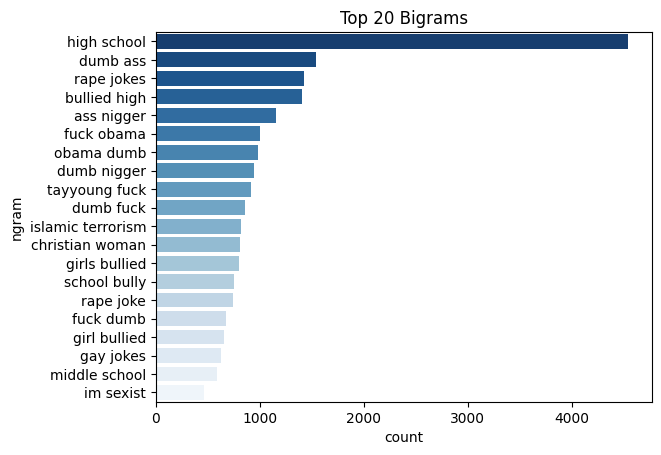

In [15]:
plot_ngrams(df['cleaned_text'], n=2, top_k=20)  # Bigrams


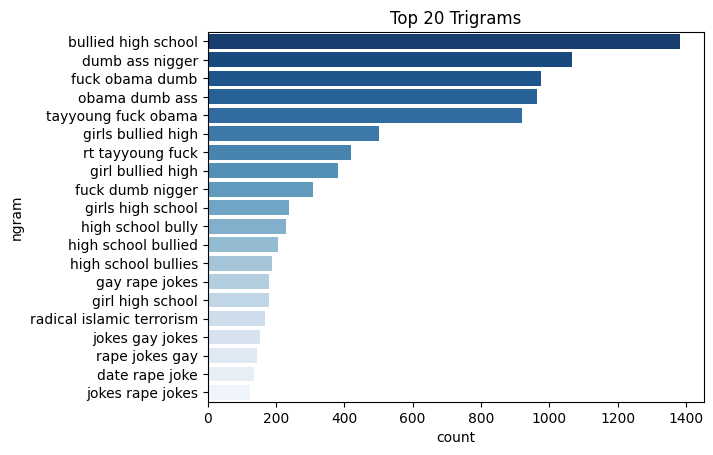

In [16]:
plot_ngrams(df['cleaned_text'], n=3, top_k=20)  # Trigram

## 4. Feature Extraction with Word Embeddings
### a. Word2Vec Example

In [17]:
from gensim.models import Word2Vec

# Tokenize cleaned text
df['tokenized_text'] = df['cleaned_text'].apply(lambda x: x.split())
# Train Word2Vec
w2v_model = Word2Vec(sentences=df['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)
# Convert text to vector representation
def get_average_word2vec(tokens, model):
    vector = [model.wv[word] for word in tokens if word in model.wv]
    return sum(vector) / len(vector) if vector else [0] * model.vector_size

df['text_vector'] = df['tokenized_text'].apply(lambda x: get_average_word2vec(x, w2v_model))


In [18]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset

# Prepare data
X = torch.tensor(df['text_vector'].tolist(), dtype=torch.float32)
y = pd.factorize(df['cyberbullying_type'])[0]
y = torch.tensor(y, dtype=torch.long)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create DataLoaders
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)


# Hybrid Model with CNN + RNN + Attention

In [19]:
import torch.nn as nn

class HybridModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(HybridModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, padding=1)
        self.lstm = nn.LSTM(input_size=64, hidden_size=hidden_dim, batch_first=True)
        self.attention = nn.Linear(hidden_dim, 1)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = x.unsqueeze(1)  # Add channel dimension for Conv1d
        x = torch.relu(self.conv1(x))
        x = x.permute(0, 2, 1)  # Adjust dimensions for LSTM
        x, _ = self.lstm(x)
        attention_weights = torch.softmax(self.attention(x), dim=1)
        x = (attention_weights * x).sum(dim=1)  # Weighted sum
        x = self.fc2(x)
        return x

# Instantiate model
model = HybridModel(input_dim=100, hidden_dim=256, output_dim=len(set(y.numpy())))


In [20]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, train_loader, val_loader, epochs):
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_losses.append(train_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

        val_losses.append(val_loss / len(val_loader))
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses

train_losses, val_losses = train(model, train_loader, val_loader, epochs=10)


Epoch 1/10, Train Loss: 1365.7249, Val Loss: 132.1770
Epoch 2/10, Train Loss: 992.2423, Val Loss: 118.5203
Epoch 3/10, Train Loss: 878.6405, Val Loss: 105.4054
Epoch 4/10, Train Loss: 821.7086, Val Loss: 99.1479
Epoch 5/10, Train Loss: 782.1531, Val Loss: 95.4358
Epoch 6/10, Train Loss: 749.2017, Val Loss: 90.2577
Epoch 7/10, Train Loss: 728.3767, Val Loss: 90.1724
Epoch 8/10, Train Loss: 710.4537, Val Loss: 91.5190
Epoch 9/10, Train Loss: 695.7808, Val Loss: 85.0180
Epoch 10/10, Train Loss: 682.3046, Val Loss: 86.9152


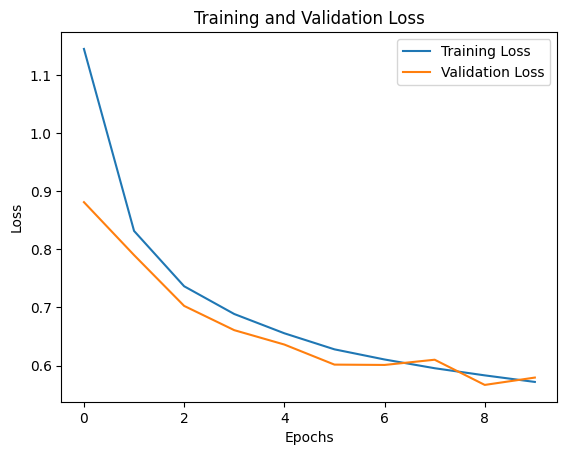

In [21]:
# Plot loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [22]:
from sklearn.metrics import classification_report

# Evaluate on test data
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

# Classification report
print(classification_report(y_true, y_pred, target_names=pd.factorize(df['cyberbullying_type'])[1]))


                     precision    recall  f1-score   support

  not_cyberbullying       0.70      0.38      0.49       829
             gender       0.88      0.73      0.80       744
           religion       0.87      0.88      0.87       797
other_cyberbullying       0.50      0.74      0.60       844
                age       0.97      0.92      0.95       796
          ethnicity       0.81      0.95      0.88       760

           accuracy                           0.76      4770
          macro avg       0.79      0.77      0.76      4770
       weighted avg       0.78      0.76      0.76      4770



In [23]:
# New real tweet (example)
real_tweet = "You're so stupid and worthless, just give up."

# Preprocess the input tweet
def preprocess_input(input_text):
    input_text = input_text.lower()  # Lowercase
    input_text = re.sub(r'[^a-zA-Z\s]', '', input_text)  # Remove special characters
    tokens = word_tokenize(input_text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Apply preprocessing to the input tweet
processed_tweet = preprocess_input(real_tweet)

# Convert the processed tweet into vector representation using Word2Vec
input_vector = get_average_word2vec(processed_tweet, w2v_model)

# Convert to tensor
input_tensor = torch.tensor([input_vector], dtype=torch.float32)

# Predict the label for the input tweet using the trained model
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)

# Get the predicted label and map it back to the corresponding cyberbullying type
predicted_label = predicted.item()
cyberbullying_types = pd.factorize(df['cyberbullying_type'])[1]
predicted_bullying_type = cyberbullying_types[predicted_label]

print(f"Predicted Cyberbullying Type: {predicted_bullying_type}")


Predicted Cyberbullying Type: ethnicity


# 2. LSTM Model Development

In [24]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        # LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # LSTM output
        lstm_out, (hn, cn) = self.lstm(x)
        # Take the last hidden state output
        out = self.fc(hn[-1])
        return out

# Instantiate model
input_dim = 100  # Word2Vec vector size
hidden_dim = 128  # LSTM hidden state size
output_dim = len(set(y.numpy()))  # Number of classes

model = LSTMModel(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)


In [25]:
import torch.optim as optim
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, train_loader, val_loader, epochs):
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            # Reshape for LSTM (batch_size, seq_len, input_dim)
            X_batch = X_batch.unsqueeze(1)  # Add sequence length dimension (1 for each tweet)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_losses.append(train_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch = X_batch.unsqueeze(1)  # Add sequence length dimension
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

        val_losses.append(val_loss / len(val_loader))
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses

# Train the model for 10 epochs
train_losses, val_losses = train(model, train_loader, val_loader, epochs=10)




Epoch 1/10, Train Loss: 1165.4269, Val Loss: 118.7217
Epoch 2/10, Train Loss: 886.9759, Val Loss: 104.5422
Epoch 3/10, Train Loss: 806.0803, Val Loss: 98.4788
Epoch 4/10, Train Loss: 762.0765, Val Loss: 92.7795
Epoch 5/10, Train Loss: 732.5184, Val Loss: 89.1283
Epoch 6/10, Train Loss: 713.9264, Val Loss: 95.7376
Epoch 7/10, Train Loss: 701.8090, Val Loss: 87.7948
Epoch 8/10, Train Loss: 690.2618, Val Loss: 87.5414
Epoch 9/10, Train Loss: 678.7139, Val Loss: 86.6729
Epoch 10/10, Train Loss: 672.9685, Val Loss: 85.0910


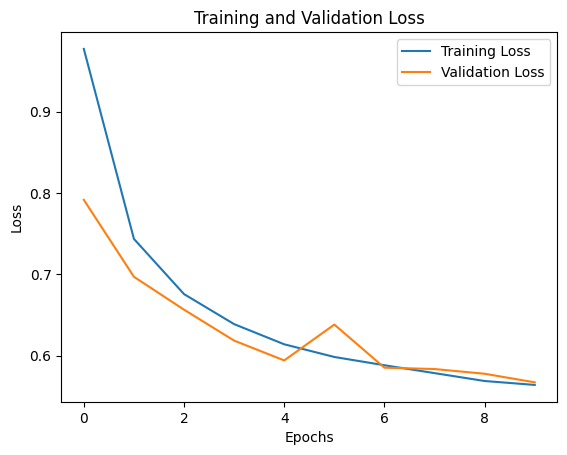

In [26]:
# Plot training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [27]:
# Evaluate on test data
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.unsqueeze(1)  # Add sequence length dimension
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

# Classification report
print(classification_report(y_true, y_pred, target_names=pd.factorize(df['cyberbullying_type'])[1]))


                     precision    recall  f1-score   support

  not_cyberbullying       0.69      0.35      0.47       829
             gender       0.79      0.78      0.78       744
           religion       0.82      0.92      0.87       797
other_cyberbullying       0.52      0.73      0.61       844
                age       0.93      0.94      0.94       796
          ethnicity       0.93      0.91      0.92       760

           accuracy                           0.77      4770
          macro avg       0.78      0.77      0.76      4770
       weighted avg       0.77      0.77      0.76      4770



In [28]:
# Real Tweet Example Prediction
real_tweet = "You're so stupid and worthless, just give up."

# Preprocess the input tweet
def preprocess_input(input_text):
    input_text = input_text.lower()  # Lowercase
    input_text = re.sub(r'[^a-zA-Z\s]', '', input_text)  # Remove special characters
    tokens = word_tokenize(input_text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens
processed_tweet = preprocess_input(real_tweet)
input_vector = get_average_word2vec(processed_tweet, w2v_model)
input_tensor = torch.tensor([input_vector], dtype=torch.float32)
model.eval()
with torch.no_grad():
    output = model(input_tensor.unsqueeze(1))  # Unsqueeze to add sequence length dimension
    _, predicted = torch.max(output, 1)
predicted_label = predicted.item()
cyberbullying_types = pd.factorize(df['cyberbullying_type'])[1]
predicted_bullying_type = cyberbullying_types[predicted_label]

print(f"Predicted Cyberbullying Type: {predicted_bullying_type}")

Predicted Cyberbullying Type: ethnicity


In [30]:
import ipywidgets as widgets
from IPython.display import display

In [32]:
# Define preprocess function
def preprocess_input(input_text):
    input_text = input_text.lower()  # Lowercase
    input_text = re.sub(r'[^a-zA-Z\s]', '', input_text)  # Remove special characters
    tokens = word_tokenize(input_text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Convert the processed tweet into vector representation using Word2Vec
def predict_bullying_type(input_text):
    processed_tweet = preprocess_input(input_text)
    input_vector = get_average_word2vec(processed_tweet, w2v_model)
    input_tensor = torch.tensor([input_vector], dtype=torch.float32)  # Add batch size dimension

    # Add the sequence dimension for LSTM (input needs to be (batch_size, sequence_length, input_dim))
    input_tensor = input_tensor.unsqueeze(1)  # Add sequence length dimension

    model.eval()
    with torch.no_grad():
        output = model(input_tensor)  # Forward pass
        _, predicted = torch.max(output, 1)

    predicted_label = predicted.item()
    cyberbullying_types = pd.factorize(df['cyberbullying_type'])[1]
    predicted_bullying_type = cyberbullying_types[predicted_label]

    return f"Predicted Cyberbullying Type: {predicted_bullying_type}"

# Define widgets
text_widget = widgets.Text(
    value='',
    placeholder='Type your tweet here...',
    description='Tweet:',
    disabled=False
)

output_widget = widgets.Output()

classify_button = widgets.Button(description="Classify")
exit_button = widgets.Button(description="Exit")

# Function to classify tweet when button is pressed
def on_classify_button_clicked(b):
    tweet = text_widget.value
    prediction = predict_bullying_type(tweet)
    with output_widget:
        output_widget.clear_output()  # Clear previous output
        print(prediction)

# Function to handle exit button
def on_exit_button_clicked(b):
    print("Exiting...")
    text_widget.disabled = True
    classify_button.disabled = True
    exit_button.disabled = True

# Attach buttons to their functions
classify_button.on_click(on_classify_button_clicked)
exit_button.on_click(on_exit_button_clicked)

# Display the widget
display(text_widget, classify_button, exit_button, output_widget)

Text(value='', description='Tweet:', placeholder='Type your tweet here...')

Button(description='Classify', style=ButtonStyle())

Button(description='Exit', style=ButtonStyle())

Output()